In [191]:
import pandas as pd
import numpy as np
import progressbar
import math
from tqdm import tqdm
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [192]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None)

subject_train = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None)
subject_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None)

features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None)

/var/folders/gx/6twqwc0556l7b9zwsrx0h_1r0000gn/T/ipykernel_88159/2744028222.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
/var/folders/gx/6twqwc0556l7b9zwsrx0h_1r0000gn/T/ipykernel_88159/2744028222.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
/var/folders/gx/6twqwc0556l7b9zwsrx0h_1r0000gn/T/ipykernel_88159/2744028222.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
/var/folders/gx/6twqwc0556l7b9zwsrx0h_1r000

In [193]:
X_train.columns = features[1]
X_test.columns = features[1]

In [194]:
X_train['activity'] = y_train[0]
X_test['activity'] = y_test[0]

X_train['subject'] = subject_train[0]
X_test['subject'] = subject_test[0]

In [195]:
activity_dict = dict(zip(activity_labels[0], activity_labels[1]))

X_train['activity'] = X_train['activity'].map(activity_dict)
X_test['activity'] = X_test['activity'].map(activity_dict)

In [196]:
X_train.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING,1


In [197]:
X_test.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity,subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,STANDING,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,STANDING,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,STANDING,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,STANDING,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,STANDING,2


In [198]:
print(X_train.isna().sum())

1
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
activity                0
subject                 0
Length: 563, dtype: int64


In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to subject
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [200]:
X_train.dtypes

1
tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
activity                 object
subject                   int64
Length: 563, dtype: object

In [201]:
X_train['activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

- LAYING (лежание) — минимальные затраты энергии.
- SITTING (сидение).
- STANDING (стояние).
- WALKING (ходьба).
- WALKING_DOWNSTAIRS (ходьба вниз по лестнице).
- WALKING_UPSTAIRS (ходьба вверх по лестнице) — максимальные затраты энергии.

In [202]:
def map_df_activity(df: pd.DataFrame):
    '''
    дропнем активность, смаппив по затратам энергии
    дропнем сабджектов, пушо это номер человека, который что-то делал
    '''
    energy_order = {
        'LAYING': 0,
        'SITTING': 1,
        'STANDING': 2,
        'WALKING': 3,
        'WALKING_DOWNSTAIRS': 4,
        'WALKING_UPSTAIRS': 5,
    }

    df['energy_mapped'] = df['activity'].map(energy_order)
    return df.drop(columns=['activity', 'subject'])

X_train = map_df_activity(X_train)

In [203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to energy_mapped
dtypes: float64(561), int64(1)
memory usage: 31.5 MB


In [204]:
def to_categorical(x, n_col=None):
    """ One-hot encoding номинального признака """
    if not n_col:
        n_col = int(np.amax(x) + 1)
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

def divide_on_feature(X, feature_i, threshold):
    """ Разделение набора данных по превышению признака feature_i порога"""
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])
    return X_1, X_2

def calculate_entropy(y):
    """ энтропия """
    log2 = lambda x: math.log(x) / math.log(2)
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy

def calculate_variance(X):
    """ дисперсия X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance

class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0
    
class SquareLoss(Loss):
    def __init__(self): pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def gradient(self, y, y_pred):
        return -(y - y_pred)

class CrossEntropy(Loss):
    def __init__(self): pass

    def loss(self, y, p):
        # Избегаем деления на 0
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        y_true = np.argmax(y, axis=1)
        y_pred = np.argmax(y, axis=1)
        return np.mean(y_true == y_pred, axis=0)

    def gradient(self, y, p):
        # Избегаем деления на 0
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)
    
bar_widgets = [
    'Обучение: ', progressbar.Percentage(), ' ', progressbar.Bar(marker="-", left="[", right="]"),
    ' ', progressbar.ETA()
]

In [205]:
class DecisionNode():
    """
    Узел или лист дерева

    Параметры:
    -----------
    feature_i: int
        Номер признака, используемого для ветвления.
    threshold: float
        Пороговое значение, с которым мы будем сравнивать значения признака feature_i при определении прогноза.
    value: float
        Предсказанный класс для задачи классификации или предсказанное значение числового признака y для задачи регрессии.
    true_branch: DecisionNode
        Следующий узел в случае превышения порога.
    false_branch: DecisionNode
        Следующий узел в случае недостижения порога.
    """
    def __init__(
        self,
        feature_i:int=None,
        threshold:float=None,
        value:float=None,
        true_branch=None,
        false_branch=None,
    ):
        self.feature_i = feature_i         
        self.threshold = threshold          
        self.value = value                 
        self.true_branch = true_branch      
        self.false_branch = false_branch 


In [206]:
class DecisionTree(object):
    """
    Родительский класс для ClassificationTree.

    Параметры:
    -----------
    min_samples_split: int
        Минимальное количество объектов, необходимое для разбиения при построении дерева.
    min_impurity: float
        Минимальная информативность, необходимая для дальнейшего ветвления при построении дерева.
    max_depth: int
        Максимальная глубина дерева.
    loss: function
        Функция потерь, используемая в градиентном бустинге для вычисления информативности.
    """
    def __init__(
        self, 
        min_samples_split:int=2,
        min_impurity:float=1e-7,
        max_depth:int=float("inf"), 
        loss=None,
    ):
        self.root = None  # Корневой узел
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self._impurity_calculation = None
        self._leaf_value_calculation = None
        self.one_dim = None
        self.loss = loss

    def fit(self, X, y, loss=None):
        """ Построение дерева """
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """ 
        Рекурсивный метод, который строит дерево решений и разбивает X и соответствующий y 
        по признаку, который (на основе информативности) наилучшим образом разделяет данные
        """

        largest_impurity = 0
        best_criteria = None    # номер факторного признака и порог
        best_sets = None        # Подмножества данных

        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Вычисляем информативность для каждого факторного признака
            for feature_i in tqdm(range(n_features)):
                # ВСЕ значения признака feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)
                
                # Цикл по всем уникальным значениям feature_i с вычислением информативности
                for threshold in unique_values:
                    # Разделение X и y по критерию X[feature_i] >= threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Значения y-в двух подмножествах
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Вычисление информативности
                        impurity = self._impurity_calculation(y, y1, y2)

                        # Если порог привел к повышению информационного выигрыша,
                        # сохраним порогт и номер признака
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   # X левого поддерева
                                "lefty": Xy1[:, n_features:],   # y левого поддерева
                                "rightX": Xy2[:, :n_features],  # X правого поддерева
                                "righty": Xy2[:, n_features:]   # y правого поддерева
                                }

        if largest_impurity > self.min_impurity:
            # Строим поддеревья
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(
                feature_i=best_criteria["feature_i"],
                threshold=best_criteria["threshold"], 
                true_branch=true_branch, 
                false_branch=false_branch,
            )

        # Определение значения в листе
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)


    def predict_value(self, x, tree=None):
        """ Рекурсивный поиск вниз по дереву с построением прогноза по значению итогового листа"""

        if tree is None:
            tree = self.root

        # Если мы находимся в листе, т.е. есть значение value, возвращаем его как прогноз
        if tree.value is not None:
            return tree.value

        # Выбор факторного признака
        feature_value = x[tree.feature_i]

        # Выбор левого или правого поддерева в зависимости от превышения порога
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Прогноз на поддереве
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Поэлементная классификация набора данных с возвращением множества прогнозов y"""
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred

    def print_tree(self, tree=None, indent=" "):
        """ Рекурсивный вывод дерева """
        if not tree:
            tree = self.root

        # Если это лист, выводим значение
        if tree.value is not None:
            print (tree.value)
        # иначе идем вглубь
        else:
            # номер признака и порог
            print ("%s:%s? " % (tree.feature_i, tree.threshold))
            # Сценарий при достижении порога
            print ("%sT->" % (indent), end="")
            self.print_tree(tree.true_branch, indent + indent)
            # Сценарий при недостижении порога
            print ("%sF->" % (indent), end="")
            self.print_tree(tree.false_branch, indent + indent)

In [207]:
class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # Вычисление уменьшения дисперсии
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

class ClassificationTree(DecisionTree):
    def _calculate_information_gain(self, y, y1, y2):
        # Вычисление информационного выигрыша
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * calculate_entropy(y1) - (1 - p) * calculate_entropy(y2)

        return info_gain

    def _majority_vote(self, y):
        most_common = None
        max_count = 0
        for label in np.unique(y):
            # Вычисление размера мажоритарного класса
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count
        return most_common

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_information_gain
        self._leaf_value_calculation = self._majority_vote
        super(ClassificationTree, self).fit(X, y)

In [208]:
class GradientBoosting(object):
    """Родительский класс для GradientBoostingClassifier и GradientBoostinRegressor. 
    Использует набор деревьев для обучения предсказанию градиента функции потерь. 

    Параметры:
    -----------
    n_estimators: int
        Число деревьев.
    learning_rate: float
        Скорость обучения - длина шага в направлении антиградиента
    min_samples_split: int
        Минимальное количество объектов, необходимое для разбиения при построении дерева.
    min_impurity: float
        Минимальная информативность, необходимая для дальнейшего ветвления при построении дерева.
    max_depth: int
        Максимальная глубина дерева.
    loss: function
        Функция потерь, используемая в градиентном бустинге для вычисления информативности.
    regression: boolean
        Регрессия или классификация.
    """
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 min_impurity, max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression
        self.bar = progressbar.ProgressBar(widgets=bar_widgets)
        
        # Средняя квадратичная ошибка для регрессии, кросс-энтропия для классификации
        self.loss = SquareLoss()
        if not self.regression:
            self.loss = CrossEntropy()

        # Инициализация
        self.trees = []
        for _ in range(n_estimators):
            tree = RegressionTree(
                    min_samples_split=self.min_samples_split,
                    min_impurity=min_impurity,
                    max_depth=self.max_depth)
            self.trees.append(tree)


    def fit(self, X, y):
        
        for i in self.bar(range(self.n_estimators)):
            if i == 0:
                self.trees[0].fit(X, y)
                y_pred = np.array(self.trees[0].predict(X))
                continue
            gradient = self.loss.gradient(y, y_pred)
            gradient *= -1 * self.learning_rate
            self.trees[i].fit(X, gradient)
            update = self.trees[i].predict(X)
            # Обновление прогноза y
            y_pred += update


    def predict(self, X):
        y_pred = np.array([])
        # Вычисление прогнозов
        for tree in self.trees:
            update = np.array(tree.predict(X))
            y_pred = update if not len(y_pred) else y_pred + update

        if not self.regression:
            # переход к распределению вероятностей
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred), axis=1), axis=1)
            # Прогноз - значение с максимальной вероятностью
            y_pred = np.argmax(y_pred, axis=1)
        return y_pred


class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=0.5, min_samples_split=2,
                 min_var_red=1e-7, max_depth=4, debug=False):
        super(GradientBoostingRegressor, self).__init__(n_estimators=n_estimators, 
            learning_rate=learning_rate, 
            min_samples_split=min_samples_split, 
            min_impurity=min_var_red,
            max_depth=max_depth,
            regression=True)

class GradientBoostingClassifier(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=.5, min_samples_split=2,
                 min_info_gain=1e-7, max_depth=2, debug=False):
        super(GradientBoostingClassifier, self).__init__(n_estimators=n_estimators, 
            learning_rate=learning_rate, 
            min_samples_split=min_samples_split, 
            min_impurity=min_info_gain,
            max_depth=max_depth,
            regression=False)

    def fit(self, X, y):
        # y = to_categorical(y)
        super(GradientBoostingClassifier, self).fit(X, y)

### почему дисперсия?
Признаки с низкой дисперсией содержат мало информации, так как их значения почти не изменяются от одного примера к другому. Такие признаки не помогают модели различать классы или предсказывать целевую переменную, поэтому их можно удалить без существенной потери качества модели.

Как это работает:
    Дисперсия — это мера разброса значений признака. Математически дисперсия вычисляется как:

$\text{Var}(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$.
где:

- xi​ — значение признака для ii-го примера,

- μ — среднее значение признака,

- n — количество примеров.

Если дисперсия признака близка к нулю, это означает, что все значения признака почти одинаковы. Например, если у вас есть признак, который всегда равен 5 для всех примеров, его дисперсия будет равна 0.


Почему это работает:

- Удаление признаков с низкой дисперсией уменьшает шум в данных.
- Это ускоряет обучение модели, так как уменьшается количество признаков.
- Это также помогает избежать переобучения, так как удаляются неинформативные признаки

главные компоненты объяснял в какой-то из работ

In [209]:
def reduce_data(original_data: np.ndarray, threshold:float = 0.1, n_components:int=50) -> np.ndarray:
    selector = VarianceThreshold(threshold=threshold)  # Удаляем признаки с дисперсией меньше 0.1
    data_reduced = selector.fit_transform(original_data)
    print(data_reduced.shape)
    pca = PCA(n_components=n_components)  # Оставляем 50 компонент
    return pca.fit_transform(data_reduced)

ROC-кривая (Receiver Operating Characteristic curve) показывает, как меняется соотношение между True Positive Rate (TPR) и False Positive Rate (FPR) при изменении порога классификации. AUC (Area Under Curve) — это площадь под ROC-кривой, которая используется как метрика качества модели.

Как это работает:

True Positive Rate (TPR):
$$
\text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

Это доля правильно предсказанных положительных примеров.

False Positive Rate (FPR):
$$
\text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
$$
Это доля отрицательных примеров, которые были ошибочно классифицированы как положительные.

ROC-кривая:

- По оси X откладывается FPR.
- По оси Y откладывается TPR.
- Кривая строится для различных порогов классификации.

AUC (Area Under Curve):

- AUC — это площадь под ROC-кривой.
- Значение AUC находится в диапазоне от 0 до 1.
- AUC = 0.5 соответствует случайной модели (диагональная линия).
- AUC = 1 соответствует идеальной модели.

Математически AUC вычисляется как:
$$
\text{AUC} = \int_{0}^{1} \text{TPR}(FPR) \, dFPR
$$

Где:
- $\text{TPR}$ — True Positive Rate,
- $\text{FPR}$ — False Positive Rate.

На практике AUC вычисляется численно с помощью метода трапеций или других методов интегрирования.

In [218]:
def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_true, y_pred, average='micro')
    print("Precision:", precision)
    recall = recall_score(y_true, y_pred, average='micro')
    print("Recall:", recall)
    f1 = f1_score(y_true, y_pred,average='micro')
    print("F1 score:", f1,)

    y_true_bin = label_binarize(y_true, classes=[i for i in range(6)])
    y_pred_bin = label_binarize(y_pred, classes=[i for i in range(6)])

    # Построение ROC-кривой для каждого класса
    for i in range(y_true_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass')
    plt.legend()
    plt.show()

In [212]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

gbc = GBC(verbose=1, learning_rate=1e-5, n_estimators=50,min_samples_split=2, max_depth=10)
gbc.fit(X_train, y_train)

/Users/kshchavlev/Documents/itmo_projects/basic_ml/env/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.3124            6.42m
         2           1.0314            7.05m
         3           0.8319            6.89m
         4           0.6807            7.21m
         5           0.5619            7.24m
         6           0.4666            7.24m
         7           0.3891            7.18m
         8           0.3255            7.07m
         9           0.2730            6.93m
        10           0.2293            6.86m
        20           0.0420            4.94m
        30           0.0079            3.23m
        40           0.0015            1.60m
        50           0.0003            0.00s


GradientBoostingClassifier(max_depth=10, n_estimators=50, verbose=1)

In [213]:
y_train_pred = gbc.predict(X_train)
y_train_pred.shape

(7352,)

In [214]:
y_train = y_train.squeeze()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


/Users/kshchavlev/Documents/itmo_projects/basic_ml/env/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


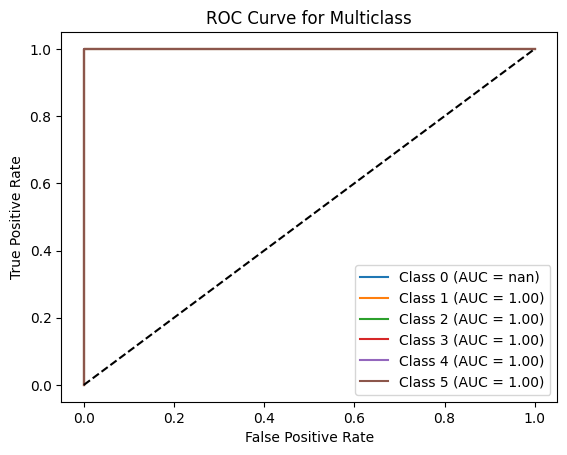

In [219]:
metrics(y_train, y_train_pred)

      Iter       Train Loss   Remaining Time 
         1           1.7838           12.79m
         2           1.7838           11.42m
         3           1.7837           11.43m
         4           1.7837           12.14m
         5           1.7836           12.63m
         6           1.7836           13.17m
         7           1.7835           13.63m
         8           1.7835           13.85m
         9           1.7834           14.04m
        10           1.7834           14.17m
        20           1.7829           13.28m
        30           1.7824           12.08m
        40           1.7819           10.49m
        50           1.7814            8.80m
        60           1.7809            7.11m
        70           1.7804            5.35m
        80           1.7799            3.57m
        90           1.7794            1.78m
       100           1.7789            0.00s
Accuracy: 0.1913764961915125
Precision: 0.1913764961915125
Recall: 0.1913764961915125
F1 score: 0.1

/Users/kshchavlev/Documents/itmo_projects/basic_ml/env/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


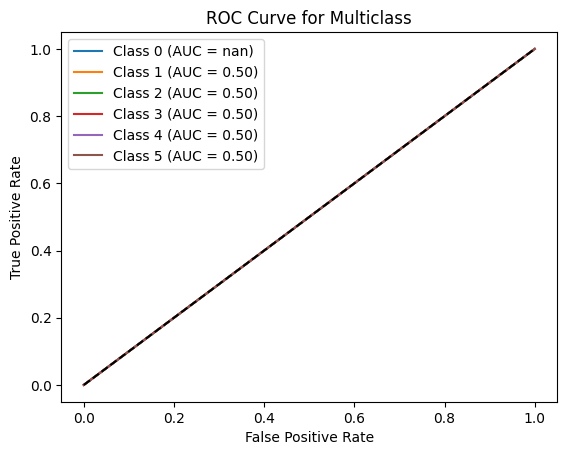

In [220]:
gbc = GBC(verbose=1, learning_rate=1e-5, n_estimators=100, min_samples_split=3, max_depth=10)
gbc.fit(X_train, y_train)
y_train_pred = gbc.predict(X_train)
metrics(y_train, y_train_pred)

### 1. Обычный градиентный бустинг (Gradient Boosting):
   - Последовательно строятся деревья решений, каждое из которых пытается исправить ошибки предыдущих.
   - Особенности:
     - Работает с числовыми данными, требует предварительной обработки категориальных признаков (например, one-hot encoding).
     - Может быть чувствителен к переобучению, если не настроены гиперпараметры (например, глубина деревьев, скорость обучения).
     - Реализации: scikit-learn (GradientBoostingClassifier/Regressor).

### 2. XGBoost (eXtreme Gradient Boosting):
   - Улучшенная версия градиентного бустинга, оптимизированная для скорости и производительности.
   - Особенности:
     - Включает регуляризацию (L1 и L2), что помогает бороться с переобучением.
     - Поддерживает пропущенные значения и автоматически обрабатывает их.
     - Использует аппаратное ускорение (например, GPU) для повышения скорости обучения.
     - Имеет встроенную поддержку категориальных признаков (в последних версиях).
     - Реализации: библиотека XGBoost.

### 3. CatBoost (Categorical Boosting):
   - Основная идея: Специализированная версия градиентного бустинга, разработанная для эффективной работы с категориальными признаками.
   - Особенности:
     - Автоматически обрабатывает категориальные признаки без необходимости их предварительной обработки (например, one-hot encoding).
     - Использует упорядоченное кодирование (ordered encoding) для борьбы с переобучением.
     - Устойчив к переобучению благодаря специальным методам, таким как упорядоченное бустинг.
     - Поддерживает GPU и имеет высокую скорость обучения.
     - Реализации: библиотека CatBoost.

### Основные различия:
| Характеристика          | Обычный градиентный бустинг | XGBoost               | CatBoost              |
|-------------------------|-----------------------------|-----------------------|-----------------------|
| Обработка категорий     | Требует предобработки       | Поддерживает | Автоматическая обработка |
| Регуляризация           | Нет                         | Да (L1, L2)           | Да (встроенная)       |
| Скорость                | Средняя                     | Высокая               | Высокая (с GPU)       |
| Переобучение            | Возможно                    | Меньше (с регуляризацией) | Меньше (упорядоченный бустинг) |
| Пропущенные значения    | Требует обработки           | да | да |
